In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [3]:
import sqlite3

with sqlite3.connect('../db.sqlite3') as con:
    query = """
    SELECT o.id, o.datetime, oi.quantity, oi.product_id, p.name, p.price
    FROM restaurant_orderitem AS oi
    JOIN restaurant_order AS o ON oi.order_id = o.id
    JOIN restaurant_product AS p ON oi.product_id = p.id
    """

    df = pd.read_sql_query(query, con)
    df.to_csv('data.csv', index=False)

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

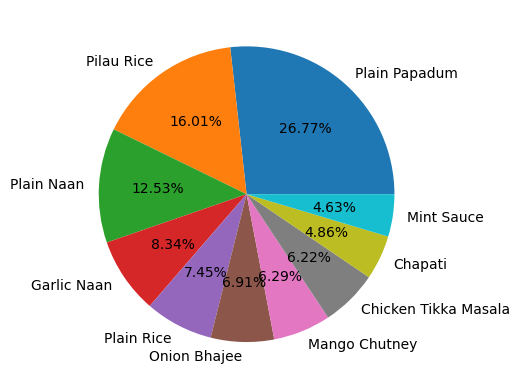

In [8]:
top_10 = df.groupby('name')['quantity'].sum().nlargest(10)
plt.pie(top_10, autopct='%.2f%%', labels=top_10.index)
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

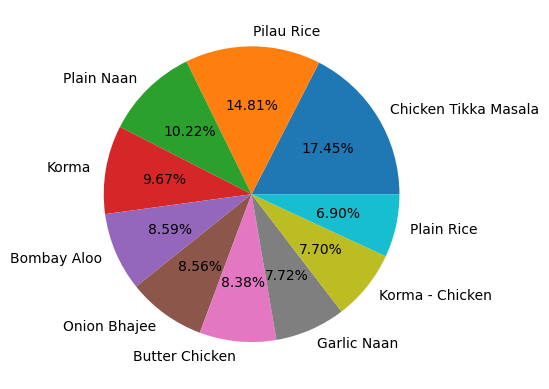

In [33]:
df["item_price"] = df["price"] * df["quantity"]
product_quantity_price = df.groupby('name')['item_price'].sum().nlargest(10)
plt.pie(product_quantity_price, autopct='%.2f%%', labels=product_quantity_price.index)
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

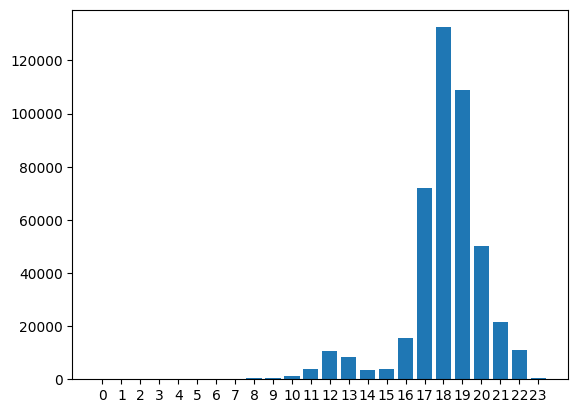

In [37]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order_hour"] = df["datetime"].dt.hour
income_by_hour = df.groupby("order_hour")["item_price"].sum()
plt.bar(income_by_hour.index, income_by_hour)
plt.xticks(range(24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

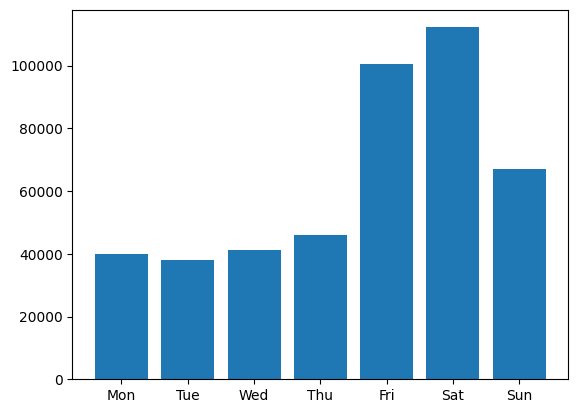

In [44]:
df["day_of_week"] = df["datetime"].dt.dayofweek
income_by_day = df.groupby("day_of_week")["item_price"].sum()
plt.bar(income_by_day.index, income_by_day)
plt.xticks(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()